<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

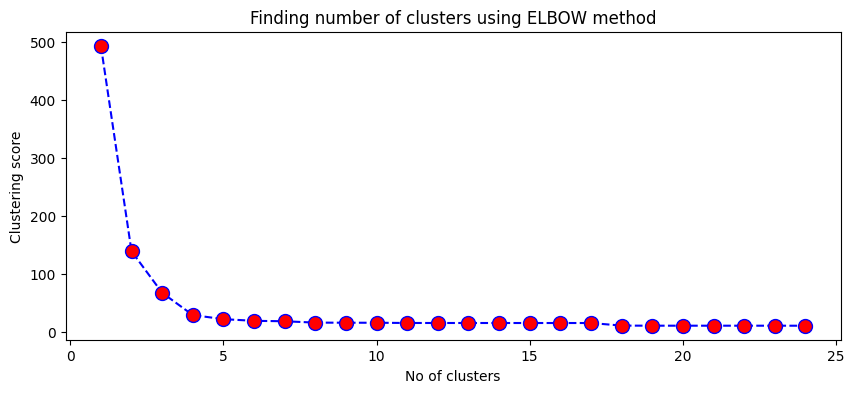

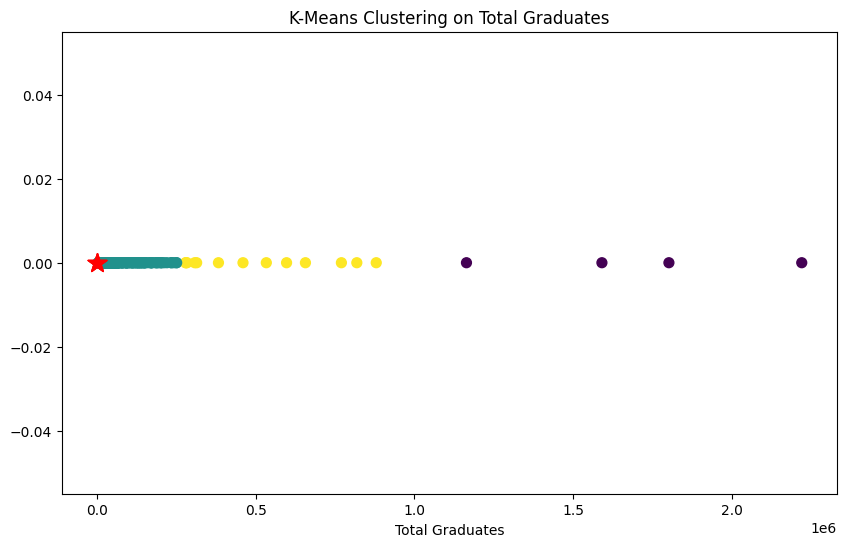

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv("/cities_r2.csv")

data.head(5)

data.describe()

data.info()

data.isna().sum()

columns_for_clustering = ['total_graduates']

# Extracting the relevant columns
selected_data = data[columns_for_clustering]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_data = sc.fit_transform(selected_data)

cluster_score=[]

for i in range(1,25):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(scaled_data)
    cluster_score.append(kmeans.inertia_)


plt.figure(figsize=(10,4))
plt.plot(range(1,25), cluster_score, color="blue", linestyle="dashed", marker='o', markerfacecolor='red', markersize=10)
plt.title("Finding number of clusters using ELBOW method")
plt.xlabel('No of clusters')
plt.ylabel('Clustering score')


kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(scaled_data)

pred = kmeans.predict(scaled_data)

data['Cluster'] = pd.DataFrame(pred, columns=['Cluster'])

print('Number of data points in each cluster=\n', data['Cluster'].value_counts())


kmeans.cluster_centers_

# Visualizing the clusters
# Plot in 1D for a single feature
plt.figure(figsize=(10, 6))
plt.scatter(data['total_graduates'], [0]*len(data), c=data['Cluster'], marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], [0]*3, marker='*', s=200, color="red")  # Center points for 1D clustering
plt.title('K-Means Clustering on Total Graduates')
plt.xlabel('Total Graduates')
plt.show()



Text(0.5, 1.0, 'Agglomerative Clustering')

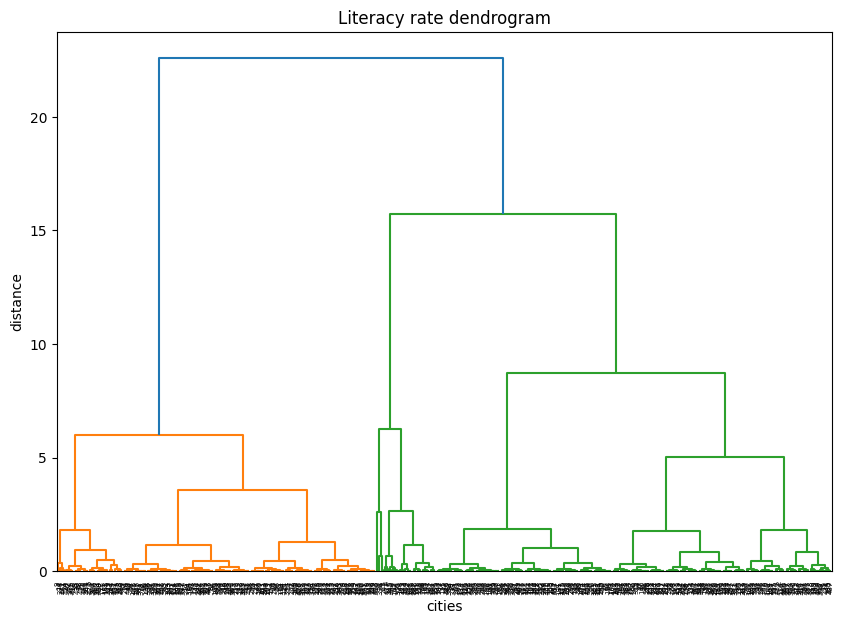

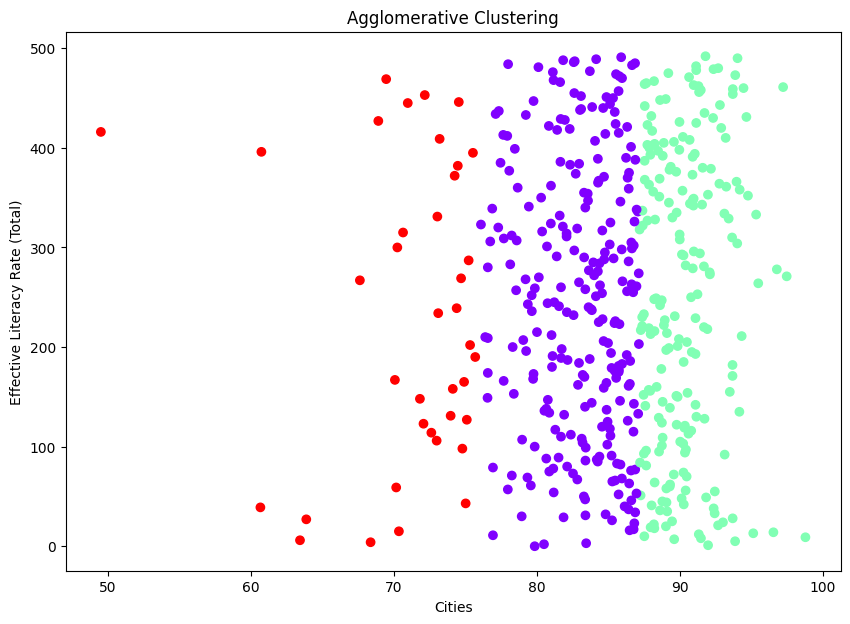

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/cities_r2.csv')
df.head(5)

data = df[['effective_literacy_rate_total']]

#standardizing the data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Literacy rate dendrogram")
plt.xlabel("cities")
plt.ylabel("distance")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward')) # its not necessary to use scaled data hierarchical clustering

# cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = AgglomerativeClustering(n_clusters=3)
labels_ = cluster.fit_predict(scaled_data)

labels_

plt.figure(figsize=(10,7))
plt.scatter( data, data.index, c=cluster.labels_, cmap='rainbow')
plt.xlabel('Cities')
plt.ylabel('Effective Literacy Rate (Total)')
plt.title('Agglomerative Clustering')